In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Load the data from csv fole to Pandas Dataframe
snapp_data = pd.read_csv('/content/drive/MyDrive/data/snapp_data_clean.csv')

In [ ]:
# printing the first 5 rows of the Dataframe
snapp_data.head()

,source,destination,latitude,longitude,service_type,datetime,hour,day,month,part_of_day,peak_hour,route,route_day_count,mean_hour_by_source,service_type_day_count,weekday,service_type_weekday_count
0,District7,Poonak Azad University,35.729,51.482,Sharing,2025-02-27 01:06:03,1,27,2,night,0,District7->Poonak Azad University,223,11.571418,864,3,7302
1,District20,Poonak Azad University,35.600,51.420,Eco,2024-09-29 14:06:02,14,29,9,noon,0,District20->Poonak Azad University,313,11.663164,2409,6,15302
2,District15,Poonak Azad University,35.639,51.499,Eco,2024-10-07 02:28:40,2,7,10,night,0,District15->Poonak Azad University,130,11.556827,1055,0,14962
3,District11,Poonak Azad University,35.676,51.421,Eco Plus,2024-10-23 01:20:00,1,23,10,night,0,District11->Poonak Azad University,551,11.542119,5653,2,42300
4,District8,Poonak Azad University,35.733,51.561,Eco Plus,2024-10-15 20:47:07,20,15,10,night,0,District8->Poonak Azad University,571,11.492052,5891,1,21643


In [ ]:

snapp_data.dtypes

,0
source,object
destination,object
latitude,float64
longitude,float64
service_type,object
datetime,object
hour,int64
day,int64
month,int64
part_of_day,object


# Visualization

In [5]:
# ## Visualization Setup
sns.set_theme(style='whitegrid', rc={'figure.figsize':(10,6),
                                     'figure.facecolor': '#f8f9fa',
                                     })

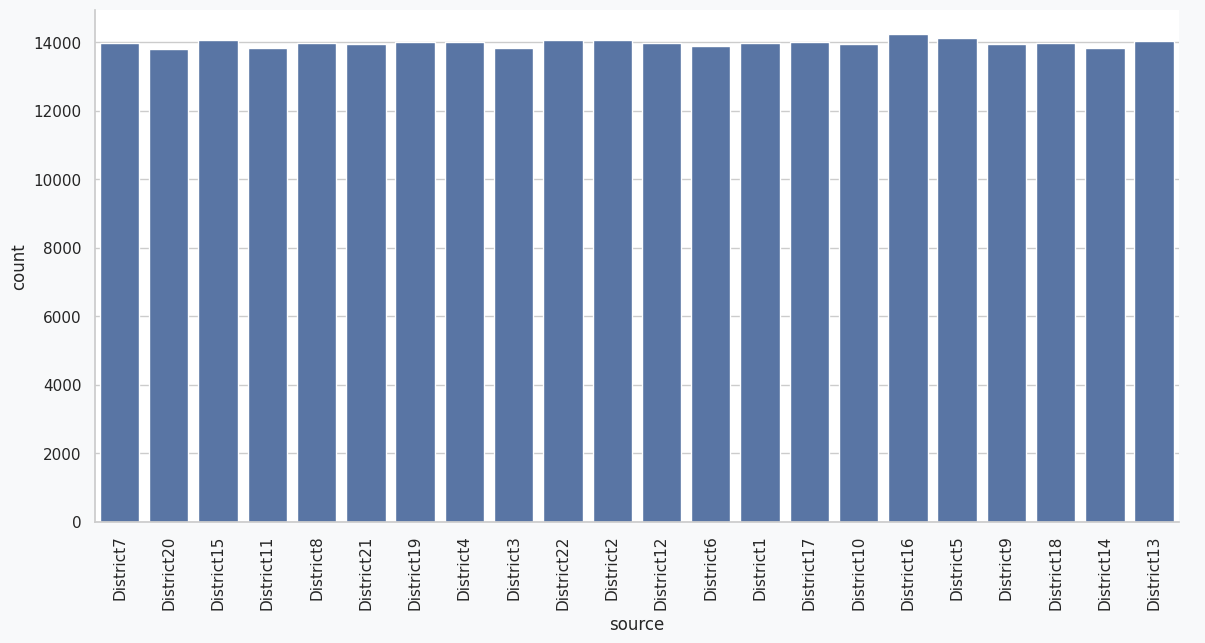

In [ ]:
# Plot count of trips by source district
ax = sns.catplot(
    data=snapp_data,
    x='source',
    kind='count',
    height=6,
    aspect=2,

)
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

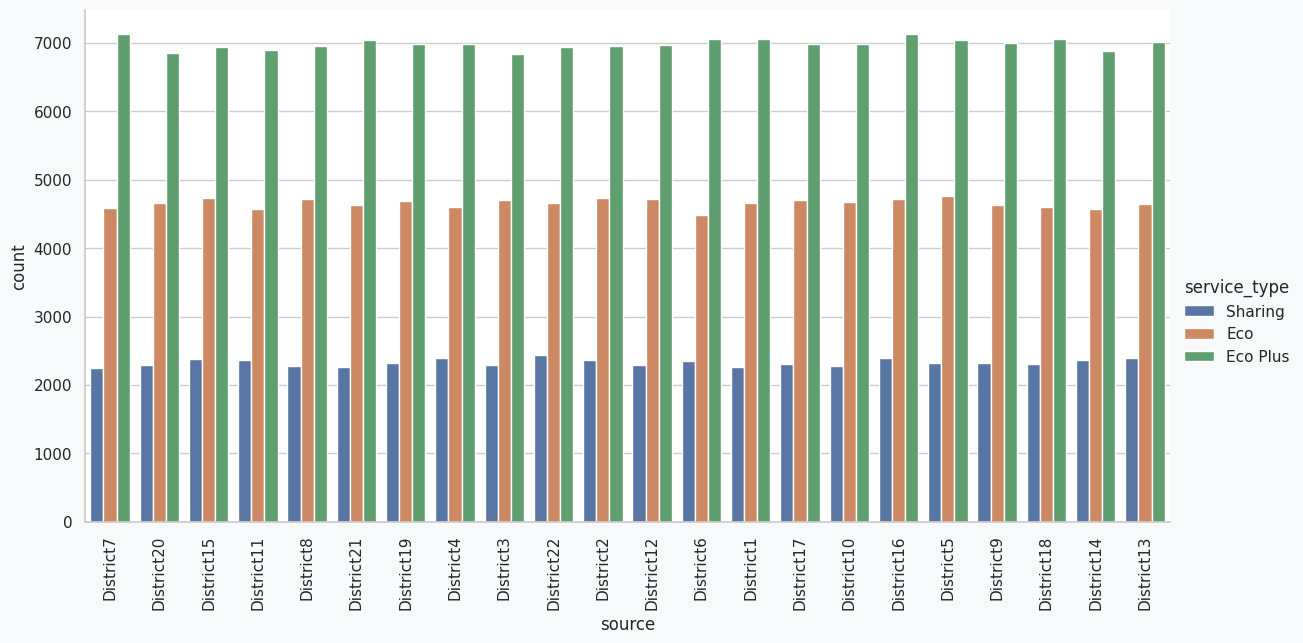

In [ ]:
# Plot count by source and service type
ax = sns.catplot(
    data=snapp_data,
    x='source',
    kind='count',
    height=6,
    aspect=2,
    hue='service_type',

)
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

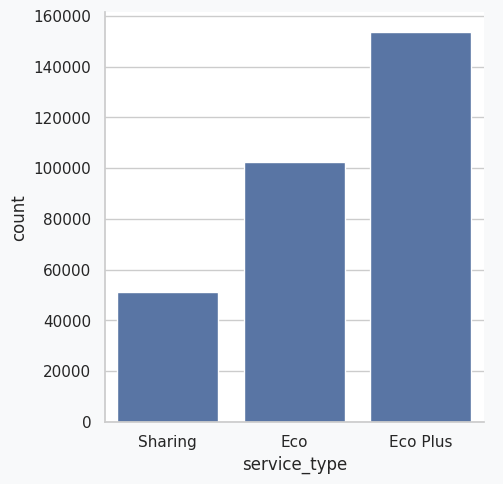

In [ ]:
# Plot count by service type
sns.catplot(
    data=snapp_data,
    x='service_type',
    kind='count',
)

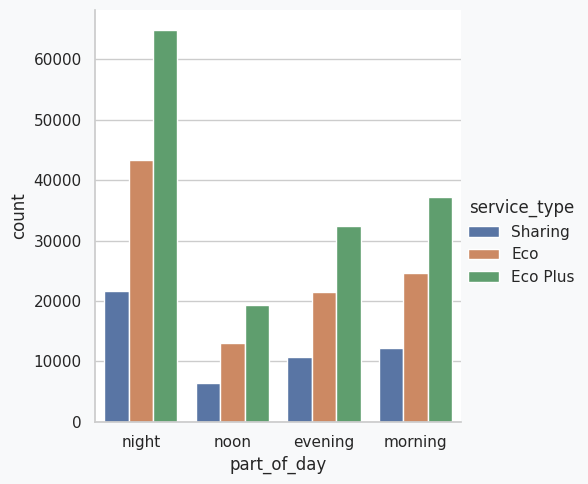

In [ ]:
# Plot trips by part of day and service type

sns.catplot(
    data=snapp_data,
    x='part_of_day',
    hue='service_type',
    kind='count',
)

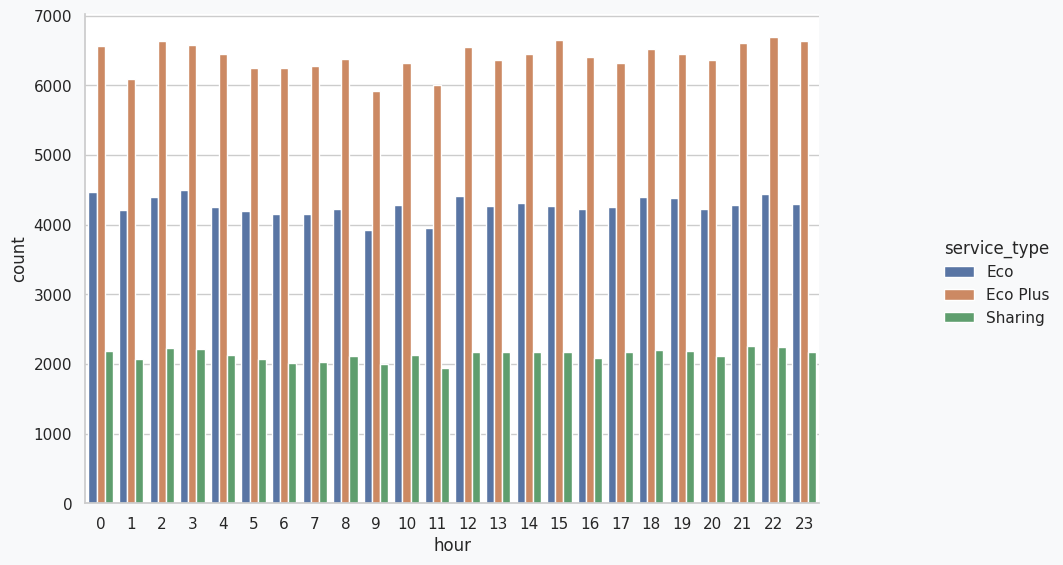

In [ ]:
# Plot trips by hour and service type
ax = sns.catplot(
    data=snapp_data,
    x='hour',
    hue='service_type',
    kind='count',
)
ax.fig.set_size_inches(12, 6)

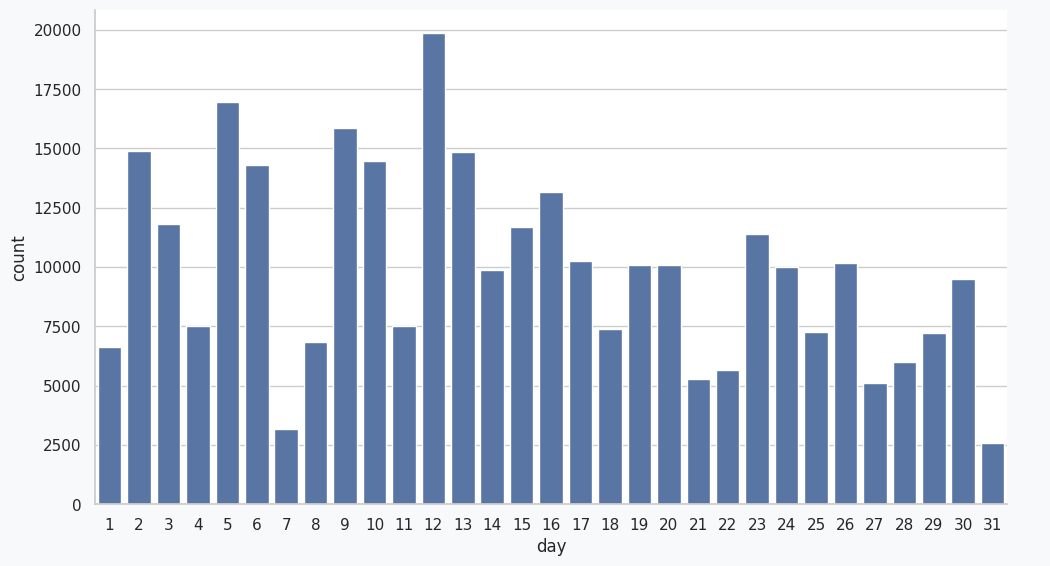

In [ ]:
# Plot trips by day of month
ax = sns.catplot(
    data=snapp_data,
    x="day",
    kind="count",
    )
ax.fig.set_size_inches(12, 6)

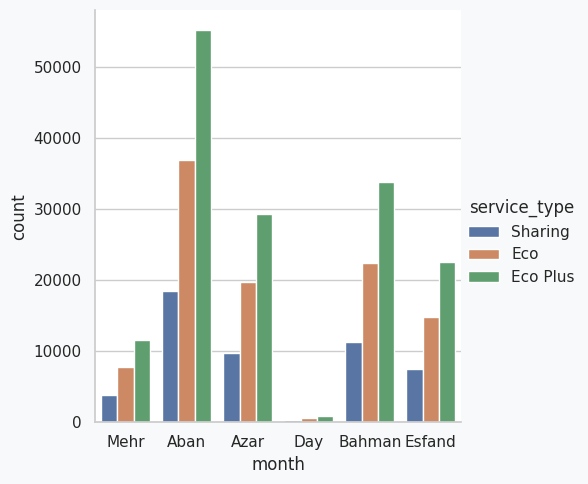

In [ ]:
# Plot trips by month (mapped to Persian calendar names) and service type
sns.catplot(
    data=snapp_data,
    x=snapp_data['month'].map({1:'Day',2:'Bahman',3:'Esfand',
                                9:'Mehr',10:'Aban',11:'Azar'}),
    hue="service_type",
    kind="count",
    order=['Mehr','Aban','Azar','Day','Bahman','Esfand'],
    )

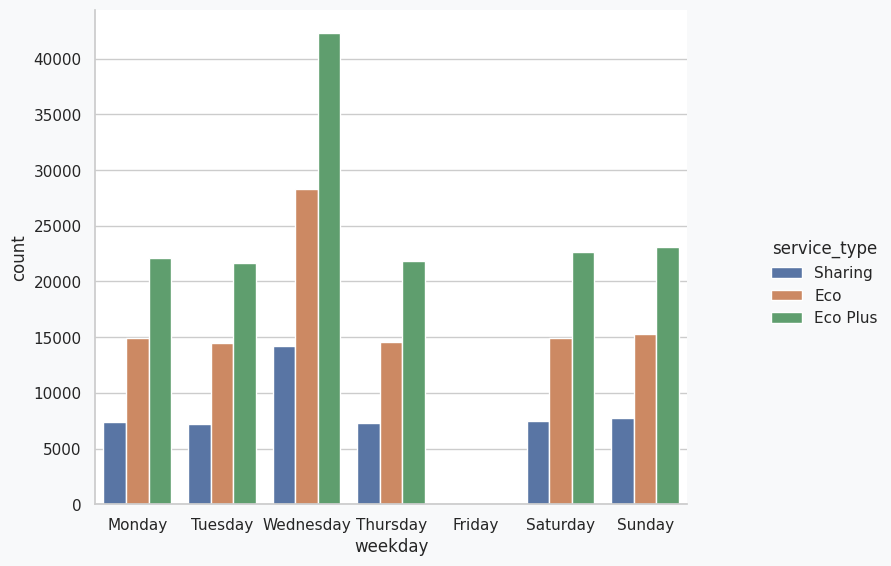

In [ ]:
# Plot trips by weekday and service type
ax = sns.catplot(
    data=snapp_data,
    x=snapp_data['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',
                                3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}),
    hue="service_type",
    kind="count",
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    )

ax.fig.set_size_inches(10, 6)

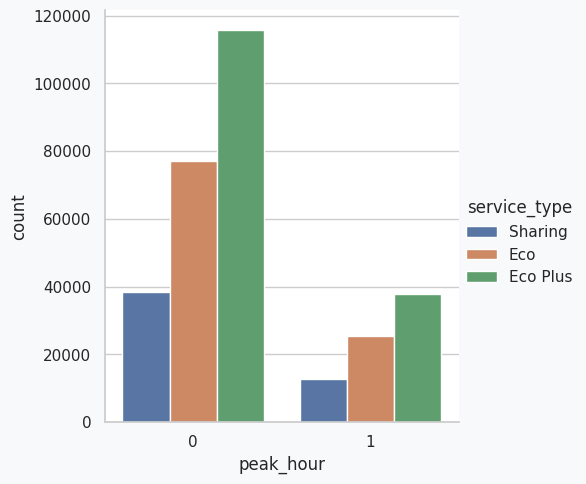

In [ ]:
# Plot trips by peak hour and service type
sns.catplot(
    data=snapp_data,
    x="peak_hour",
    hue="service_type",
    kind="count",
    )


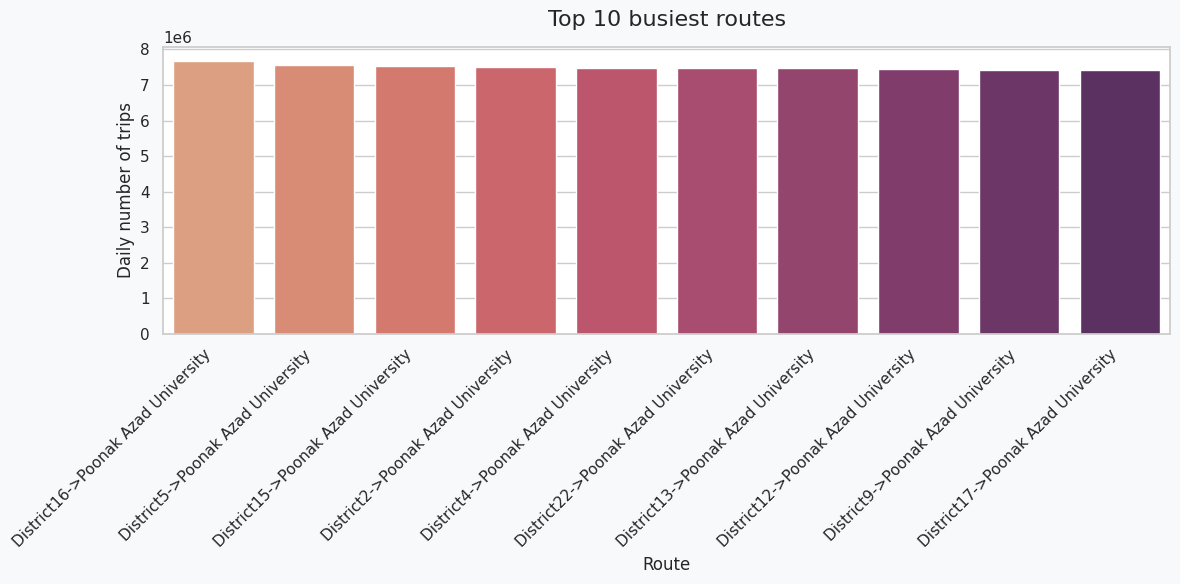

In [ ]:
# Frequent routes

top_routes = snapp_data.groupby('route')['route_day_count'].sum().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_routes,
    x='route',
    y='route_day_count',
    palette='flare'

)
plt.title('Top 10 busiest routes', fontsize=16, pad=15)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Daily number of trips', fontsize=12)
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

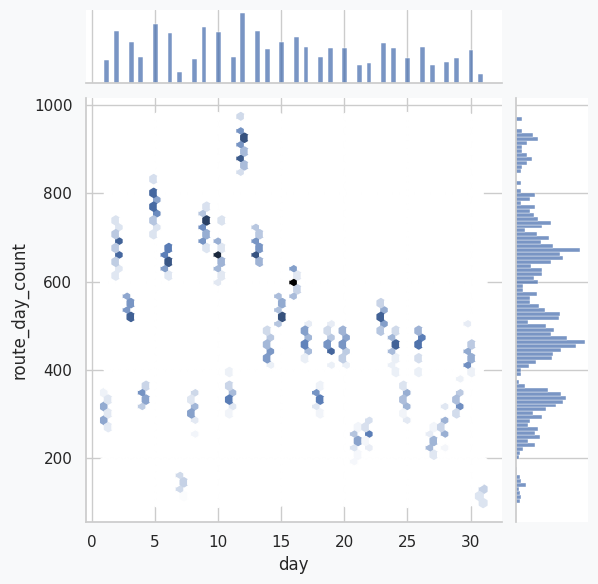

In [ ]:
# Hexbin plot of day vs route_day_count
sns.jointplot(data=snapp_data, x="day", y="route_day_count", kind="hex")


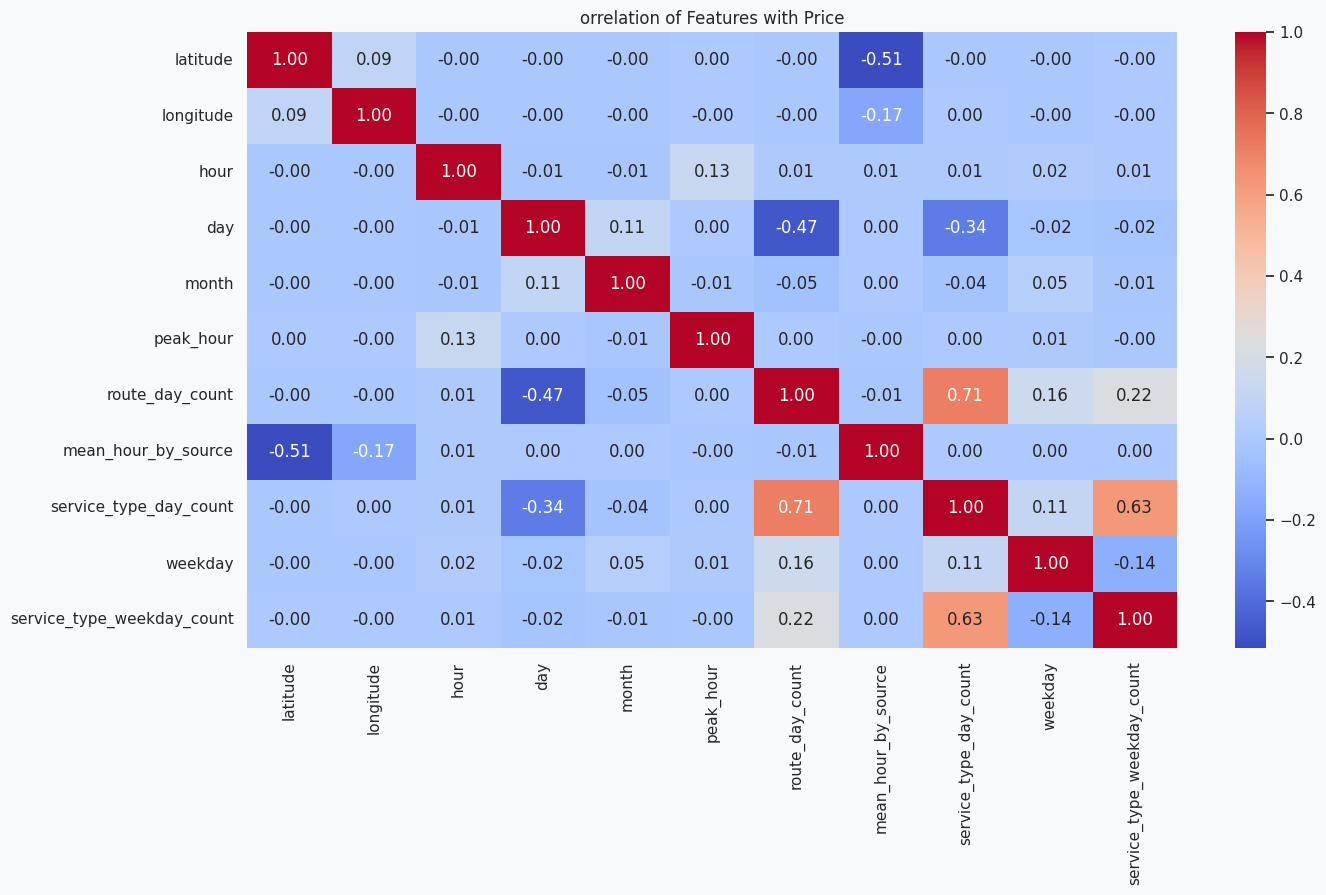

In [ ]:
# Correlation heatmap of numeric features
corr = snapp_data.corr(numeric_only=True)

plt.figure(figsize=(15, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    )
plt.title('orrelation of Features with Price')
plt.show()

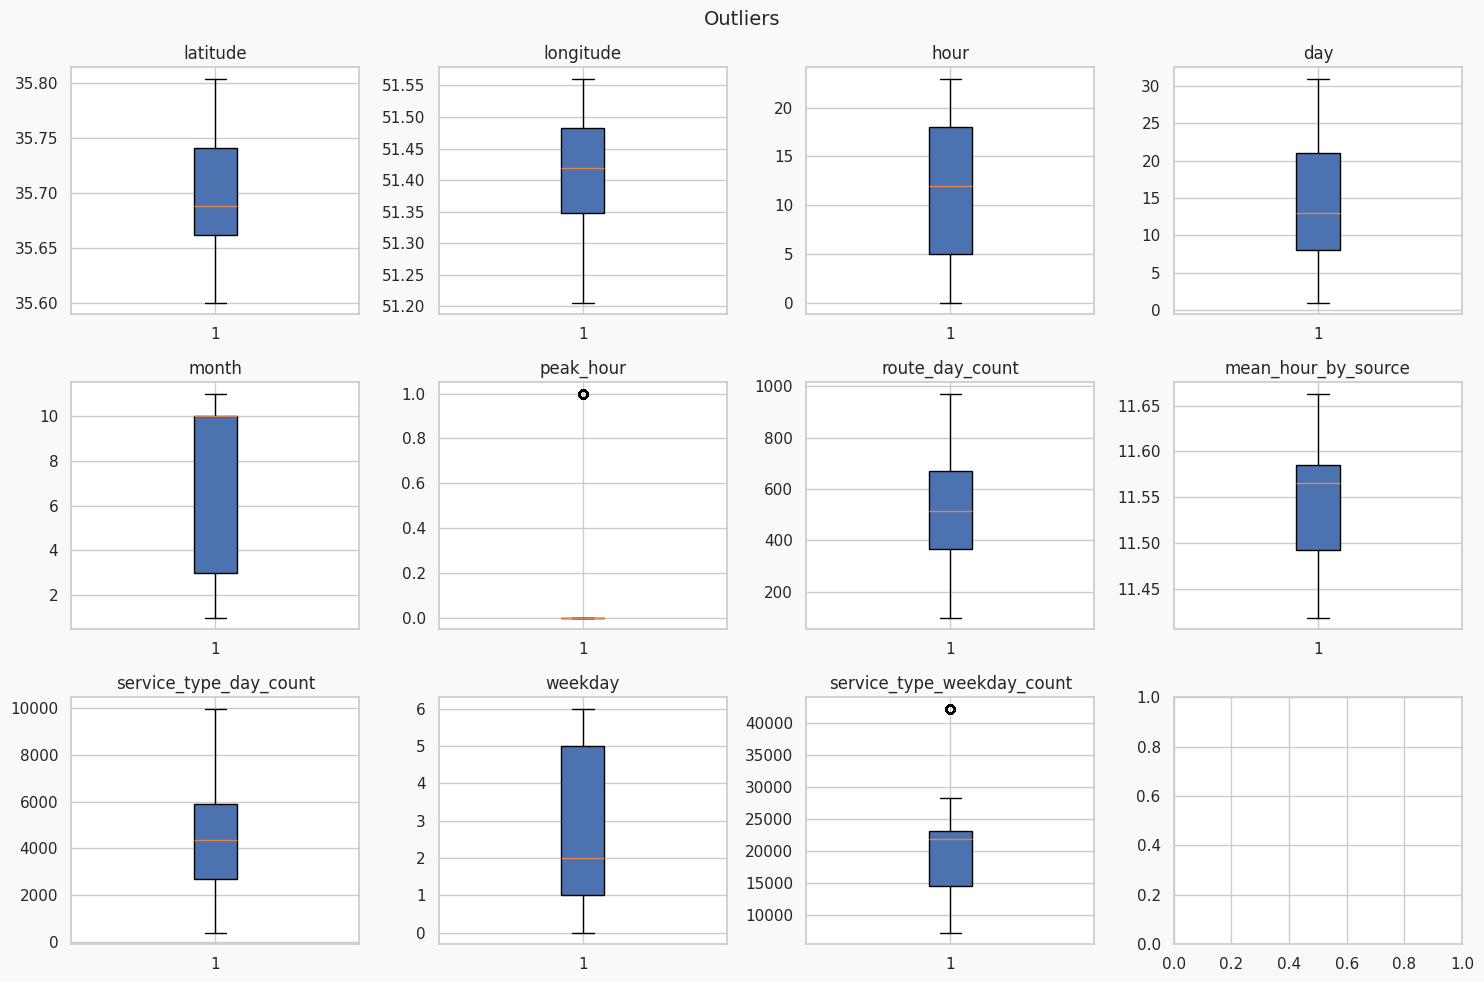

In [ ]:
# Boxplots for numeric columns to detect outliers

num_columns = snapp_data.select_dtypes(include=np.number).columns

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Outliers", fontsize=14)

for ax, column in zip(axs.flat, num_columns):
  ax.boxplot(
      snapp_data[column],
      vert=True,
      patch_artist=True,

             )
  ax.set_title(column)

plt.tight_layout()
plt.show()

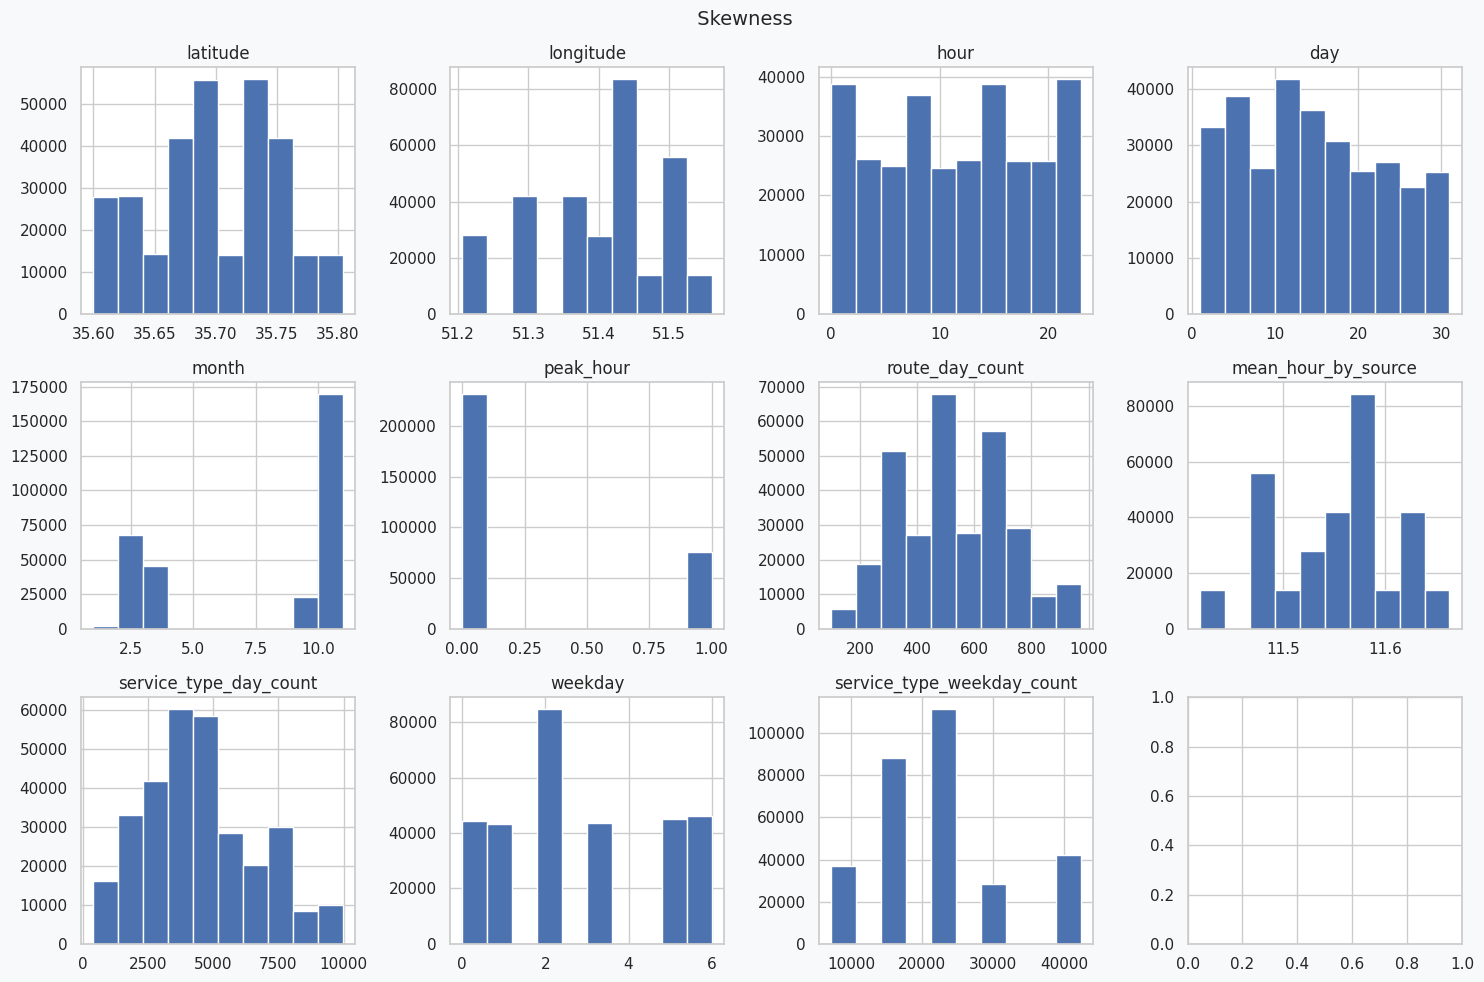

In [ ]:
# Histograms to check skewness

num_columns = snapp_data.select_dtypes(include=np.number).columns

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle(" Skewness", fontsize=14)

for ax, column in zip(axs.flat, num_columns):
  ax.hist(snapp_data[column])
  ax.set_title(column)

plt.tight_layout()
plt.show()